In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Load the data
raw_data = pd.read_csv('Motor RP Analyst Interview Activity template.csv')

raw_data.head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,16042,28/02/2019,0.002740,0.00000,0.0000,0,NaN,NaN,NaN,NaN,...,FIAT,20,20,1,MANUAL,East Midlands,Male,01/02/2019,26/11/2016,Blue
1,41414,20/03/2019,1.000000,238.33650,238.3365,0,NaN,NaN,NaN,NaN,...,FORD,25,25,1,MANUAL,South East,Female,01/11/2017,12/03/2012,Grey
2,58837,29/11/2019,0.420765,77.31347,183.7450,0,NaN,NaN,NaN,NaN,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,01/09/2016,09/11/1994,Silver
3,65415,17/02/2019,1.000000,494.98150,246.5586,0,NaN,NaN,NaN,NaN,...,NISSAN,31,31,1,AUTOMATIC,North West,Female,16/02/2019,01/07/2019,White
4,81565,24/04/2018,1.000000,120.05060,120.0506,0,NaN,NaN,NaN,NaN,...,KIA,61,61,1,MANUAL,South West,Male,01/06/2013,07/04/1974,Silver


In [2]:
# Claim Count
def structure_un(x):
    print("Total number of claims:", x.sum())


structure_un(raw_data.loc[:, 'claim_count'])


def structure(x):
    print("Average claim count   :", round(x.mean(), 2))
    print("Minimum claim count   :", x.min())
    print("Maximum claim count   :", x.max())


structure(raw_data[raw_data['claim_count'] > 0]['claim_count'])

Total number of claims: 7934
Average claim count   : 1.07
Minimum claim count   : 1
Maximum claim count   : 4


In [3]:
# Claim Amount
import numpy as np


def structure_v(x):
    print("Mean                   :", round(x.mean(), 2))
    print("Median                 :", round(x.median(), 2))
    print("Minimum                :", round(x.min(), 2))
    print("Maximum                :", round(x.max(), 2))
    print("25th percentile of arr :",
          round(np.percentile(x, 25), 2))
    print("75th percentile of arr :",
          round(np.percentile(x, 75), 2))


structure_v(raw_data[raw_data['capped_incurred'].notnull()]['capped_incurred'])

Mean                   : 2589.68
Median                 : 159.5
Minimum                : -1854.64
Maximum                : 55259.6
25th percentile of arr : 34.5
75th percentile of arr : 2868.07


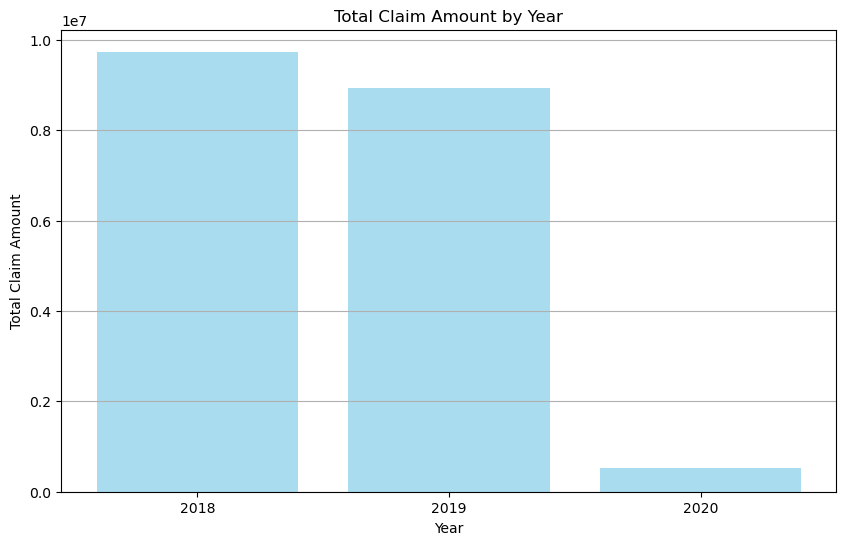

In [6]:
# Convert the 'start_date' column to datetime format
raw_data['start_date'] = pd.to_datetime(raw_data['start_date'], dayfirst=True)
raw_data['start_year'] = raw_data['start_date'].dt.year

raw_data.head()

# Group the data by 'start_year' and calculate the total claim amount for each year
claim_amount_by_year = raw_data.groupby('start_year')['capped_incurred'].sum().reset_index()

# Plot the total claim amount for each year
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(claim_amount_by_year['start_year'], claim_amount_by_year['capped_incurred'], color='skyblue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount by Year')
plt.xticks(claim_amount_by_year['start_year'])
plt.grid(axis='y')
plt.show()

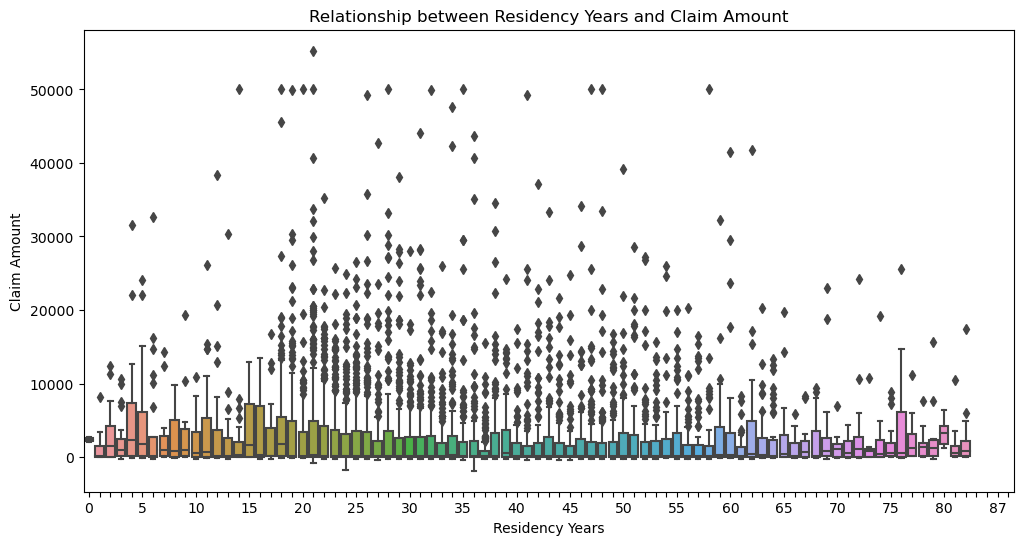

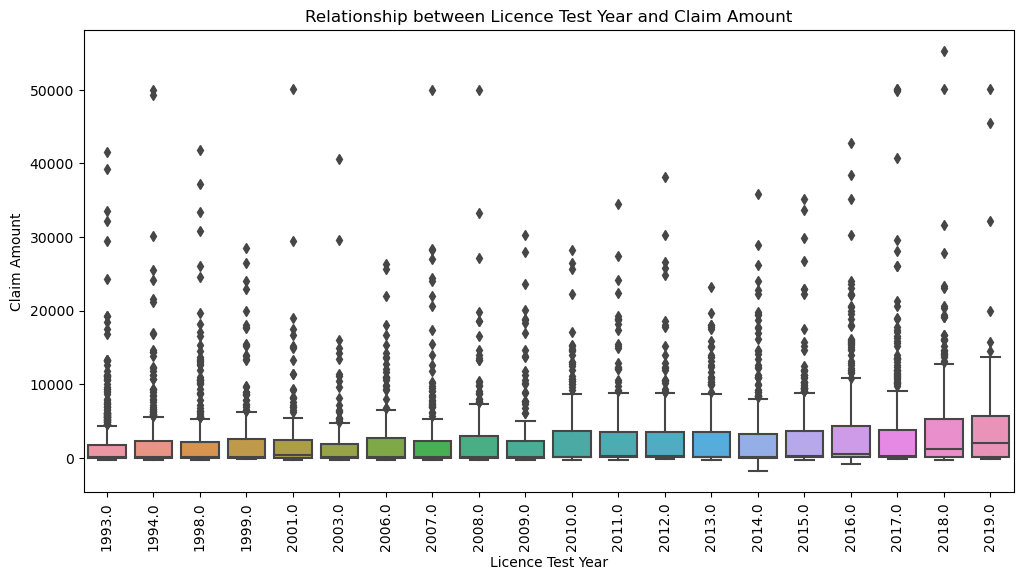

In [9]:
import seaborn as sns
# Plot the relationship between 'd1_residency_years' and 'capped_incurred' with better x-axis ticks
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='d1_residency_years', y='capped_incurred', data=raw_data)
plt.title('Relationship between Residency Years and Claim Amount')
plt.xlabel('Residency Years')
plt.ylabel('Claim Amount')

# Display only one in every 5 labels on the x-axis to avoid crowding
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()


# Convert the 'licence_test_date' column to datetime format
raw_data['licence_test_date'] = pd.to_datetime(raw_data['licence_test_date'], errors='coerce')
raw_data['licence_test_year'] = raw_data['licence_test_date'].dt.year

raw_data.head()

# Now that we have the 'licence_test_year' column, let's plot the relationship between 'licence_test_year' and 'capped_incurred'
# Avoid crowding
# Just consider only the years with the top 20 highest total claim amounts

# Find the top 20 years with the highest total claim amounts
top_20_years = raw_data.groupby('licence_test_year')['capped_incurred'].sum().nlargest(20).index
# Filter the data to include only the top 20 years
data_filtered = raw_data[raw_data['licence_test_year'].isin(top_20_years)]

# Plot the relationship between 'licence_test_year' and 'capped_incurred'
plt.figure(figsize=(12, 6))
sns.boxplot(x='licence_test_year', y='capped_incurred', data=data_filtered)
plt.title('Relationship between Licence Test Year and Claim Amount')
plt.xlabel('Licence Test Year')
plt.ylabel('Claim Amount')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Which are the most important predictors of individual claim size?
# vehicle_age
# vehicle_value
# business_provider
# vehicle_annual_mileage
# premium
# residency_years
# licence_year
# ...

In [ ]:
# Some of the information in the data set is clearly missing. Why might we be missing this data and 
# How does this impact any predictions you might make?
# not applicable?
# data collection issues?

# bias
# loss of information
# complication in analysis


In [ ]:
# The appropriateness of the data provided - after the model 